
# Project: Investigate 'no-show appointment' data in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected a dataset that collects information from 100k medical appointments in Brazil focussing on behaviour of patients with respect to their appointments in that if they show up for their appointment. The dataset has following information available:

    1. PatientId	      :ID of patient
    2. AppointmentID      :Appointment ID
    3. Gender             :Gender of the Patient (M/F)
    4. ScheduledDay       :Tells us on what day the patient set up their appointment
    5. AppointmentDay     :Day of appointment
    6. Age                :Age of the patient
    7. Neighbourhood      :Indicates the location of the hospital
    8. Scholarship        :Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família"(0=No, 1=yes)
    9. Medical conditions :Hipertension(0/1),Diabetes(0/1),Alcoholism (0/1),Handcap(0/1/2/3/4)	Medical conditions that the patients are suffering from
    10. SMS_received      :SMS recieved by the patient of their appointment (0=No, 1=Yes)
    11. No-show status    :This columns says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

**The questions I will be asking are**:

1. 'No shows' relationship with the 
      -  Age of the patient
      -  Gender of the patient
      -  Whether they recieved the SMS

2. 'No shows' relationship with the medical conditions of the patient

3. 'No shows' relationship with the fact that the patient is enrolled in Brazilian Welfare program

4. 'No shows' relationship with the neighborhood


In [800]:
# importing statements for all packages that are being used: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [801]:
# Loading data and printing out a few lines. 
df=pd.read_csv('noshow.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

### Exploring my data with info() and describe() functions

In [802]:
#Checking the information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [803]:
#Observing beaviour of dataframe numerical columns
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### Statistical analysis of the data provided:
There are 110527 values.
**On Average** age is 37%, 9.8% people on average have Bolsa Familia, 19% have Hypertension,7% have diabetes,3% are Alcoholics and 2.22% are handicap. Where 32% people recieved appointment SMS 

In [804]:
# shape of the dataframe
df.shape

(110527, 14)

In [805]:
#check for duplicated values
sum(df.duplicated())

0

In [806]:
#checking for Null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [807]:
#checking datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [809]:
#Finding rown with handicap vlaues greater than 1
hd_e=df.query('Handcap>1')
hd_e.head()

PatientId  AppointmentID Gender          ScheduledDay  \
946   7.282582e+13        5582483      M  2016-04-14T09:26:08Z   
1665  1.242919e+13        5525497      M  2016-03-30T09:16:41Z   
1666  1.242919e+13        5525498      M  2016-03-30T09:16:41Z   
2071  1.242919e+13        5640120      M  2016-04-29T10:08:48Z   
2091  1.491829e+13        5638626      F  2016-04-29T08:13:59Z   

            AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
946   2016-04-29T00:00:00Z   94    BELA VISTA            0             1   
1665  2016-04-29T00:00:00Z   64  SANTA MARTHA            0             1   
1666  2016-04-29T00:00:00Z   64  SANTA MARTHA            0             1   
2071  2016-04-29T00:00:00Z   64  SANTA MARTHA            0             1   
2091  2016-04-29T00:00:00Z   11    ANDORINHAS            0             0   

      Diabetes  Alcoholism  Handcap  SMS_received No-show  
946          1           0        2             1      No  
1665         0           1        2             1      No  
1666         0           1        2             0      No  
2071         0           1        2             0      No  
2091         0           0        2             0      No

In [811]:
# Finding total number of data rows with Handicap value greater than 1
hd_e['Handcap'].count()

199

<font color=blue>

#### Observation: 
-  There are no missing ,duplicated or Null data values.
-  I see descripency in *age* variable where minimum value is *-1* which isn't accurate, I will fix this value with the mean value. I will treat 0 years as new born or children under 1 yr of age
-  I will change the labels of columns to small alphabets with underscore to make them easy to read
-  Fixing the datatypes of the column appointment day to date format
-  There are 199 rown with Handcap value greater than 1, so will modify all values in that column to be either 0 or 1.All values greater than 1 will be assumed to be as 1.

</font>

### Data Cleaning

In [814]:
#changing column labels
#converting to lower case
df.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace='True')

# Inserting "_" where needed
df.rename(index=str,columns={'patientid':'patient_id'}, inplace=True)
df.rename(index=str,columns={'appointmentid':'appointment_id'}, inplace=True)
df.rename(index=str,columns={'scheduledday':'scheduled_day'}, inplace=True)
df.rename(index=str,columns={'appointmentday':'appointment_day'}, inplace=True)
df.rename(index=str,columns={'no-show':'no_show'}, inplace=True)
df.head()

patient_id  appointment_id gender         scheduled_day  \
0  2.987250e+13         5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14         5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12         5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11         5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12         5642494      F  2016-04-29T16:07:23Z   

        appointment_day  age      neighbourhood  scholarship  hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handcap  sms_received no_show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [815]:
# fixing data types of field
df['scheduled_day']=pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day']=pd.to_datetime(df['appointment_day'])

df.head()

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0  2.987250e+13         5642903      F    2016-04-29      2016-04-29   62   
1  5.589978e+14         5642503      M    2016-04-29      2016-04-29   56   
2  4.262962e+12         5642549      F    2016-04-29      2016-04-29   62   
3  8.679512e+11         5642828      F    2016-04-29      2016-04-29    8   
4  8.841186e+12         5642494      F    2016-04-29      2016-04-29   56   

       neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handcap  sms_received no_show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

In [816]:
#check for the rows with -1 as age 
df_error=df.query('age==-1')
df_error

patient_id  appointment_id gender scheduled_day appointment_day  age  \
99832  4.659432e+14         5775010      F    2016-06-06      2016-06-06   -1   

      neighbourhood  scholarship  hipertension  diabetes  alcoholism  handcap  \
99832         ROMÃO            0             0         0           0        0   

       sms_received no_show  
99832             0      No

<font color=blue>
Since the age -1 is appearing only once with the gender as'female';  I will replace -1 with the average female age from this data to fix this issue
</font>

In [817]:
#fixing the age problem
#Mean female age of the group excluding the problematic value
df_fix=round(df.query('age != -1').age.mean())
df_fix

37

In [818]:
#replacing less than 0 values with the mean age (at(),set_value failed)
df.iat[99832,5]=df_fix
df.iat[99832,5]

37

In [819]:
#checking that the data is cleaned now for age
df.describe().age

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [820]:
#Fixing handicap values
df.loc[df['handcap'] > 1, ['handcap']] = 1


In [821]:
#Checking if the Handicap column values are fixed
df['handcap'].describe()


count    110527.000000
mean          0.020276
std           0.140942
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: handcap, dtype: float64

In [823]:
#Checking if the Handicap column values are fixed
hd=df.query('handcap>1')
hd.head()

Empty DataFrame
Columns: [patient_id, appointment_id, gender, scheduled_day, appointment_day, age, neighbourhood, scholarship, hipertension, diabetes, alcoholism, handcap, sms_received, no_show]
Index: []

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1(a): Relationship of 'No-show' with the 'age'of the patients

In [825]:
#Count of All those patient record where 'no_show' was affirmative (yes) or negative (no)
df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [826]:
# Creating a new databasefor no shows as yes 
df_noshow_y=df.query('no_show in "Yes"')
df_noshow_y.head()

patient_id  appointment_id gender scheduled_day appointment_day  age  \
6   7.336882e+14         5630279      F    2016-04-27      2016-04-29   23   
7   3.449833e+12         5630575      F    2016-04-27      2016-04-29   39   
11  7.542951e+12         5620163      M    2016-04-26      2016-04-29   29   
17  1.479497e+13         5633460      F    2016-04-28      2016-04-29   40   
20  6.222575e+14         5626083      F    2016-04-27      2016-04-29   30   

     neighbourhood  scholarship  hipertension  diabetes  alcoholism  handcap  \
6       GOIABEIRAS            0             0         0           0        0   
7       GOIABEIRAS            0             0         0           0        0   
11  NOVA PALESTINA            0             0         0           0        0   
17       CONQUISTA            1             0         0           0        0   
20  NOVA PALESTINA            0             0         0           0        0   

    sms_received no_show  
6              0     Yes  
7              0     Yes  
11             1     Yes  
17             0     Yes  
20             0     Yes

In [827]:
df_noshow_y.describe()

patient_id  appointment_id           age   scholarship  hipertension  \
count  2.231900e+04    2.231900e+04  22319.000000  22319.000000  22319.000000   
mean   1.467523e+14    5.652259e+06     34.317667      0.115507      0.169004   
std    2.549905e+14    7.429686e+04     21.965941      0.319640      0.374764   
min    5.628261e+06    5.122866e+06      0.000000      0.000000      0.000000   
25%    4.176779e+12    5.614192e+06     16.000000      0.000000      0.000000   
50%    3.156794e+13    5.657916e+06     33.000000      0.000000      0.000000   
75%    9.454270e+13    5.703175e+06     51.000000      0.000000      0.000000   
max    9.996585e+14    5.789986e+06    115.000000      1.000000      1.000000   

           diabetes    alcoholism       handcap  sms_received  
count  22319.000000  22319.000000  22319.000000  22319.000000  
mean       0.064071      0.030333      0.018236      0.438371  
std        0.244885      0.171505      0.133805      0.496198  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

In [1022]:
# creating an array for age vc no show events count
df_y=df_noshow_y.groupby(['age'],as_index=False).no_show.count()
df_y.head()

age  no_show
0    0      639
1    1      415
2    2      252
3    3      277
4    4      282

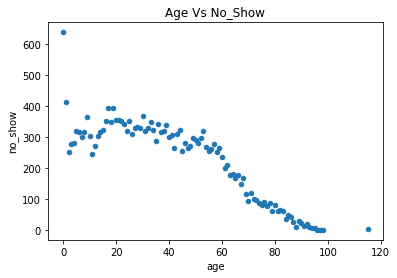

In [829]:
#Plotting a scatter plot to observe the relationship between no show and patient age
df_y.plot(x='age', y='no_show',kind='scatter');
plt.title('Age Vs No_Show');

In [830]:
#for analysis creating steps of age bracket will be used in next section
steps=[0,16,33,51,115]

In [831]:
#Labels for the four age groups
step_names = ['Youngest (0-16)', 'Young(16-33)', 'Middle age(33-51)', 'Old(51-115)']

In [833]:
# Creates no show mean gender wise column
df_noshow_y['age_brackets'] = pd.cut(df_noshow_y['age'], steps, labels=step_names)

C:\Users\Anam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<font color=blue> Analysis 1.a <br>
    There seems to be a negative co-relation between the patients age and their 'no-show' behaviour.No show Significantly reducing for patients over 60 years of age </font>

### Research Question 1(b): Relationship of 'No-show' with the 'gender 'of the patients

In [916]:
# creating an array for gender vs no show events count
noshow_gender=df_noshow_y.groupby(['gender']).no_show.count()
noshow_gender

gender
F    14594
M     7725
Name: no_show, dtype: int64

In [917]:
totals=df.groupby(['gender']).no_show.count()
totals

gender
F    71840
M    38687
Name: no_show, dtype: int64

In [921]:
proportions=(noshow_gender/totals)*100
proportions

gender
F    20.314588
M    19.967948
Name: no_show, dtype: float64

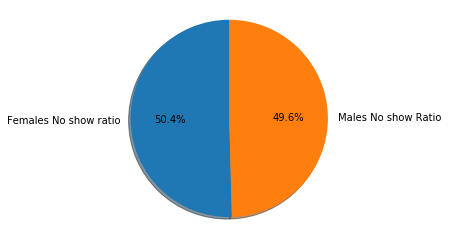

In [922]:
#Creating a pie chart
labels = 'Females No show ratio', 'Males No show Ratio '
sizes = proportions
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

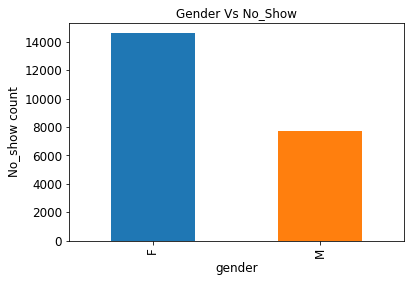

In [989]:
#Plotting a bar plot to observe the relationship between no show and patient gender
df_g.plot(x='gender', y='no_show',kind='bar',fontsize=12);
plt.title('Gender Vs No_Show');
plt.xlabel('gender',fontsize=12)
plt.ylabel('No_show count',fontsize=12);

<font color=blue> Observing age and gender together </font>

In [721]:
# creating an array for gender & age vs no show events count
df_b=df_noshow_y.groupby(['gender','age'],as_index=False).no_show.count();
df_b.head()

gender  age  no_show
0      F    0      319
1      F    1      202
2      F    2      111
3      F    3      143
4      F    4      139

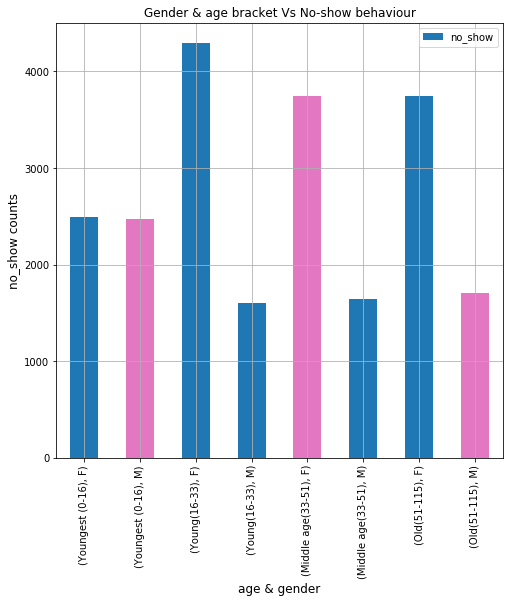

In [919]:
# creating an array for gender & age brakets vs no show events count
df_b=df_noshow_y.groupby(['age_brackets','gender']).no_show.count();
colors=['tab:Blue','tab:Pink']
df_b.plot(kind='bar',title='Gender & age bracket Vs No-show behaviour',figsize=(8,8), color=colors)
plt.xlabel('age & gender',fontsize=12)
plt.ylabel('no_show counts',fontsize=12);
plt.legend()
plt.grid(True);

<font color=blue> Analysis 1.b<br>The ratio of female patients missing their appointment is same as male . however since the sample contains more female patients than males therefore the total count of them missing the appointment is more. Females in the category of 16-33 years of age depicted the highest "no-show" count whereas for males it was 0-16 years of age </font>

### Research Question 1(c): Relationship of 'SMS_Recieved' with the 'No_show' behaviour of the patient for the appointment

In [858]:
#creating an array for patients who recieved SMS or not and wether they appeared for the appointment or not
df_st=df.groupby(['sms_received','no_show'],as_index=False).age.count()
df_st.head()


sms_received no_show    age
0             0      No  62510
1             0     Yes  12535
2             1      No  25698
3             1     Yes   9784

In [1019]:
# defining my function for calculating proportions
def calculateproportions(df):
 prop= []
 totals=df.sum()
 prop=round(df/totals*100)
 return(prop)

In [1020]:
#calculating proportions with function
proportions=calculateproportions(df_st['age'])
proportions

0    57.0
1    11.0
2    23.0
3     9.0
Name: age, dtype: float64

In [874]:
#Validating the created function
#total count of patients
totals=df_st['age'].sum()
totals

110527

In [879]:
#Proportion of count wrt SMS and no show behaviour
proportions=round(df_st['age']/totals*100)
proportions

0    57.0
1    11.0
2    23.0
3     9.0
Name: age, dtype: float64

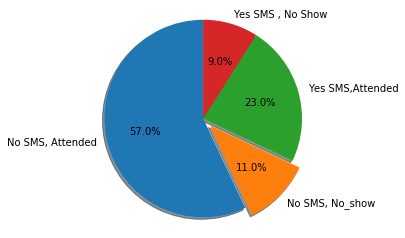

In [877]:
#Visualfor SMS Vs No-show behaviour
#Creating a pie chart
labels = 'No SMS, Attended', 'No SMS, No_show', 'Yes SMS,Attended', 'Yes SMS , No Show'
sizes = proportions
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'No SMS and no show by the patient')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

In [854]:
#creating an array for patients who didnt showup for their appointments vs if they recieved SMS or not
df_s=df_noshow_y.groupby(['sms_received'],as_index=False).no_show.count()
df_s.head()


sms_received  no_show
0             0    12535
1             1     9784

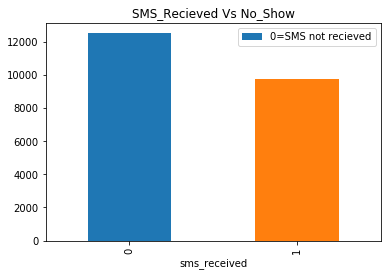

In [764]:
#Plotting a bar plot to observe the relationship between no show and sms_recieved
df_s.plot(x='sms_received', y='no_show',kind='bar');
plt.title('SMS_Recieved Vs No_Show');
handles=[('0=SMS not recieved'), ('1=SMS Recieved')]
plt.legend(handles);


<font color=blue> Analysis 1.c
    <br> There is no relationship between SMS and attendace of the patient for the appointment </font>

### Research Question 2 : Relationship of no_show behaviour with the medical conditions of the patient

In [883]:
#Sum up the medical conditions if they exist 
col_list=['hipertension','diabetes','alcoholism','handcap']
df['any_medical_cond']=df[col_list].sum(axis=1)
df.head()

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0  2.987250e+13         5642903      F    2016-04-29      2016-04-29   62   
1  5.589978e+14         5642503      M    2016-04-29      2016-04-29   56   
2  4.262962e+12         5642549      F    2016-04-29      2016-04-29   62   
3  8.679512e+11         5642828      F    2016-04-29      2016-04-29    8   
4  8.841186e+12         5642494      F    2016-04-29      2016-04-29   56   

       neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handcap  sms_received no_show  any_medical_cond  
0        0             0      No                 1  
1        0             0      No                 0  
2        0             0      No                 0  
3        0             0      No                 0  
4        0             0      No                 2

In [892]:
#Finding how many "no shows" have been or not against number of medical conditions
df_mc=df.groupby(['any_medical_cond','no_show']).no_show.count()
df_mc.head(10)

any_medical_cond  no_show
0                 No         66512
                  Yes        17603
1                 No         14874
                  Yes         3249
2                 No          6290
                  Yes         1368
3                 No           523
                  Yes           95
4                 No             9
                  Yes            4
Name: no_show, dtype: int64

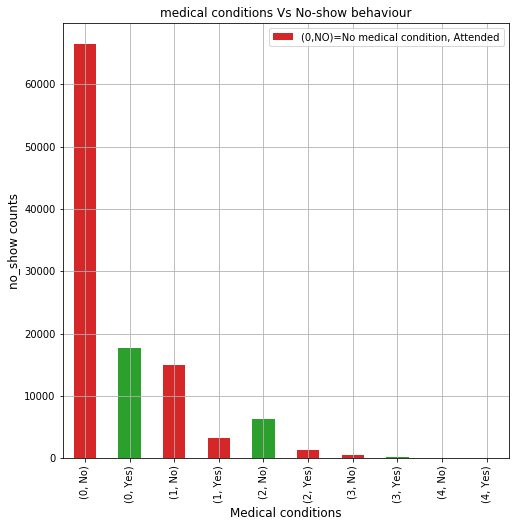

In [893]:
# creating a bar chart for medical conditions and No_show trend
colors=['tab:red','tab:green']
df_mc.plot(kind='bar',title='medical conditions Vs No-show behaviour',figsize=(8,8), color=colors)
plt.xlabel('Medical conditions',fontsize=12)
plt.ylabel('no_show counts',fontsize=12);
labels=['(0,NO)=No medical condition, Attended','(0,yes)=No Medical condition,Not attended']
plt.legend(labels)
plt.grid(True);

<font color=blue> 
    **Analysis 2: <br>
    There is no relationship with of a patient having any medical condition with the fact whether they appear for the appointment or not
    
 </font>

### Research Question 3 : Relationship of no_show behaviour with the patient having brazilian welfare or not

In [776]:
#defining a dataframe for Scholarship and No_show
df_scl=df.groupby(['scholarship','no_show']).age.count()
df_scl.head()

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: age, dtype: int64

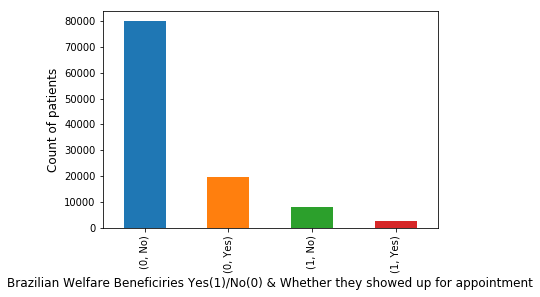

In [778]:
#Creating a plot for scholarship and no show count
df_scl.plot(x='scholarship',y='age',kind='bar')
plt.xlabel('Brazilian Welfare Beneficiries Yes(1)/No(0) & Whether they showed up for appointment',fontsize=12)
plt.ylabel('Count of patients',fontsize=12);

In [779]:
df_sc=df_noshow_y.groupby(['scholarship']).no_show.count()
df_sc.head()

scholarship
0    19741
1     2578
Name: no_show, dtype: int64

In [780]:
df_sc.plot(x='scholarship',y='no_show',kind='bar')
plt.xlabel('Brazilian Welfare Beneficiries Yes(1)/No(0)',fontsize=12)
plt.ylabel('Count of patients who didnt show up for the appointment',fontsize=12);

<font color=blue> 
    **Analysis 3: <br>
    There is no relationship with of a patient having Bolsa Familia and not showing for their appointment. The highest number of patients who showed up for appointment had no insurance through welfare system.
    However amongst the patients who didnt show up for the appointment the majority of them didnt have Bolsa Familia
    
 </font>

### Research Question 4: Relationship of no_show behaviour with the neighbourhood

In [1009]:
df_nb=df_noshow_y.groupby(['neighbourhood'],as_index=False).no_show.count()
df_nb

neighbourhood  no_show
0             AEROPORTO        1
1            ANDORINHAS      521
2       ANTÔNIO HONÓRIO       50
3   ARIOVALDO FAVALESSA       62
4        BARRO VERMELHO       91
5            BELA VISTA      384
6        BENTO FERREIRA      193
7             BOA VISTA       58
8                BONFIM      550
9             CARATOÍRA      591
10               CENTRO      703
11              COMDUSA       56
12            CONQUISTA      160
13           CONSOLAÇÃO      237
14           CRUZAMENTO      304
15             DA PENHA      429
16           DE LOURDES       47
17            DO CABRAL       88
18           DO MOSCOSO       92
19            DO QUADRO      140
20       ENSEADA DO SUÁ       52
21           ESTRELINHA      106
22         FONTE GRANDE      149
23       FORTE SÃO JOÃO      346
24            FRADINHOS       48
25           GOIABEIRAS      137
26       GRANDE VITÓRIA      217
27             GURIGICA      456
28                HORTO       42
29    ILHA DAS CAIEIRAS      235
..                  ...      ...
50       NOVA PALESTINA      402
51       PARQUE MOSCOSO      179
52              PIEDADE       88
53    PONTAL DE CAMBURI       12
54       PRAIA DO CANTO      190
55         PRAIA DO SUÁ      294
56             REDENÇÃO      275
57            REPÚBLICA      143
58          RESISTÊNCIA      906
59                ROMÃO      474
60        SANTA CECÍLIA      123
61          SANTA CLARA      134
62         SANTA HELENA       37
63          SANTA LUÍZA       77
64          SANTA LÚCIA       86
65         SANTA MARTHA      496
66         SANTA TEREZA      272
67          SANTO ANDRÉ      508
68        SANTO ANTÔNIO      484
69        SANTOS DUMONT      369
70          SANTOS REIS      112
71     SEGURANÇA DO LAR       28
72         SOLON BORGES       69
73         SÃO BENEDITO      287
74        SÃO CRISTÓVÃO      363
75             SÃO JOSÉ      428
76            SÃO PEDRO      515
77           TABUAZEIRO      573
78        UNIVERSITÁRIO       32
79           VILA RUBIM      141

[80 rows x 2 columns]

In [1003]:
# plot for neighbourhood and cooresponding patient attendance 
#plt.hist(df_nb)
df_nb.plot(kind='hist');


<font color=blue> 
    **Analysis 4: <br>
 A few locations have patients greater than 1000+ who havent attended the appointments.
 </font>

<a id='conclusions'></a>
## Conclusions
<font color=blue>
I have throughly analyzed data provided to establish correlations between patient profile and their no_show behaviour. 
Co-relations were drawn between No shows and the following parameters:
-  Age of the patient
-  Gender of the patient
-  Whether they recieved the SMS of appointment
-  Medical conditions of the patient
-  Fact that the patient is enrolled in Brazilian Welfare program
-  Relationship with the Hospital location
    
The provided data was petty clean and straight forward. As per my analysis it is diffuclt to conclude any concrete corrleation between no_show behaviour and the patient profile or the given parameters. Observations are summarized as follows:

1. The ratio of absence from appointment for male and female patients is approximately the same. The data has overall more samples for female gender than male and hence ratios were calculated.
2. Age seems to have no impact on the rate of no show at appointments either, however from those not showing up the number of younger patients is higher
3. There is no relationship between SMS and attendance of patients.
4. No relationship between patient's medical condition (Diabetes , hypertension, Alcoholism, handicap) snd their attendace for the appointment
5. No relatioship between scholarship and attendance of patients

**Limitations**:
I dont feel there is any limitation to this dataset except for an observation that it has more female samples than male.Another possiblity that can be is thatthe properties of this dataset might not be truly reflecting of the actual patients profiles and other appointment parameters and therefore all analysis based on this dataset might not be applicable. 
